<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/factornpca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Factor Analysis**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DATA/timeser.csv')

df

,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,01-Jan-14,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,02-Jan-14,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,03-Jan-14,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,04-Jan-14,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
4,05-Jan-14,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,28-Apr-15,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,29-Apr-15,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,30-Apr-15,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,01-May-15,7.40,6.4,230.0,72,385.0,20.06,70,42,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [4]:
df.dropna(inplace=True)

df

,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,01-Jan-14,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,02-Jan-14,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,03-Jan-14,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,04-Jan-14,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
4,05-Jan-14,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,28-Apr-15,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,29-Apr-15,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,30-Apr-15,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,01-May-15,7.40,6.4,230.0,72,385.0,20.06,70,42,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [5]:
df=df.drop(['Date'], axis = 1)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72,385.0,20.06,70,42,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [6]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

In [8]:
df.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.6,0.299591,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831


In [9]:
Factor1 = df[['pH'	,'DO',	'TDS',	'Alkalinity',	'EC',	'Na',	'Ca',	'Mg',	'K'	,'F',	'Cl',	'Nitrate',	'Sulphate',	'Phosphate']]
Factor1.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate
0,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.8,0.758000,6.534660,0.06211
1,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.8,0.196062,8.138620,0.00960
2,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.8,0.298875,3.855625,0.01280
3,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.6,0.299591,2.238750,0.01536
4,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.3,0.106000,5.600000,0.01000


In [10]:
corrm = Factor1.corr()
corrm

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate
pH,1.000000,0.211109,-0.236712,0.175510,-0.243521,-0.273298,-0.103435,-0.060885,-0.344524,-0.227349,-0.294046,-0.396854,-0.386411,-0.040246
DO,0.211109,1.000000,-0.222928,-0.036796,-0.226791,-0.181963,-0.182463,-0.067469,-0.268489,-0.232656,-0.177212,-0.139853,-0.291412,0.066248
TDS,-0.236712,-0.222928,1.000000,0.637716,0.984754,0.833671,0.892126,0.705149,0.754319,0.744330,0.841918,0.539486,0.831473,0.077804
Alkalinity,0.175510,-0.036796,0.637716,1.000000,0.614956,0.381228,0.696089,0.658814,0.289176,0.360956,0.384024,0.094369,0.229730,-0.025792
EC,-0.243521,-0.226791,0.984754,0.614956,1.000000,0.821030,0.880295,0.687292,0.744921,0.732718,0.826369,0.534420,0.833973,0.091789
Na,-0.273298,-0.181963,0.833671,0.381228,0.821030,1.000000,0.634518,0.500436,0.709595,0.633003,0.973823,0.480209,0.660852,0.105225
Ca,-0.103435,-0.182463,0.892126,0.696089,0.880295,0.634518,1.000000,0.585701,0.585581,0.624190,0.635604,0.413112,0.729384,0.039442
Mg,-0.060885,-0.067469,0.705149,0.658814,0.687292,0.500436,0.585701,1.000000,0.462190,0.562817,0.526408,0.276092,0.538041,0.004944
K,-0.344524,-0.268489,0.754319,0.289176,0.744921,0.709595,0.585581,0.462190,1.000000,0.633910,0.728000,0.599805,0.704721,0.064916
F,-0.227349,-0.232656,0.744330,0.360956,0.732718,0.633003,0.624190,0.562817,0.633910,1.000000,0.651898,0.556951,0.713750,0.090891


In [11]:
eigen_values = np.linalg.eigvals(corrm)
eigen_values_cumvar = (eigen_values/12).cumsum()
eigen_values_cumvar

array([0.63056878, 0.77079817, 0.86109078, 0.93024279, 0.98430034,
       1.03300648, 1.07046714, 1.10691481, 1.13327438, 1.15485613,
       1.16062107, 1.16150619, 1.16350044, 1.16666667])

In [12]:
Factor_Analysis = FactorAnalyzer(n_factors=4,rotation='varimax',method='ml')
Factor_Analysis.fit(Factor1)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='ml', n_factors=4, rotation='varimax', rotation_kwargs={},
               use_smc=True)

In [13]:
loadings = Factor_Analysis.loadings_
Variable_Names =['pH'	,'DO',	'TDS',	'Alkalinity',	'EC',	'Na',	'Ca',	'Mg',	'K'	,'F',	'Cl',	'Nitrate',	'Sulphate',	'Phosphate'] 
Matrix = pd.DataFrame(loadings,index = Variable_Names,
                      columns = ['Factor_1','Factor_2','Factor_3','Factor_4'])
Matrix

,Factor_1,Factor_2,Factor_3,Factor_4
pH,0.138338,-0.445357,-0.178187,-0.055521
DO,-0.094631,-0.279518,-0.049866,0.009068
TDS,0.651469,0.516498,0.446319,0.323582
Alkalinity,0.907710,-0.225358,0.162325,0.279136
EC,0.638502,0.535638,0.426950,0.312375
Na,0.316744,0.396206,0.815801,0.181447
Ca,0.777613,0.437152,0.226513,0.181539
Mg,0.443565,0.084250,0.207980,0.864812
K,0.305353,0.549255,0.447270,0.217111
F,0.352374,0.498180,0.330229,0.342257


In [14]:
pd.DataFrame(Factor_Analysis.get_factor_variance(),
             index = ['SS Loading','Population Variance','Cummulative Variance'],
             columns = ['Factor_1','Factor_2','Factor_3','Factor_4'])

,Factor_1,Factor_2,Factor_3,Factor_4
SS Loading,3.020479,2.909198,2.338533,1.430158
Population Variance,0.215748,0.207800,0.167038,0.102154
Cummulative Variance,0.215748,0.423548,0.590586,0.692741


**PCA**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
df1 = df[['pH'	,'DO',	'TDS',	'Alkalinity',	'EC',	'Na',	'Ca',	'Mg',	'K'	,'F',	'Cl',	'Nitrate',	'Sulphate',	'Phosphate']]
df1.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate
0,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.8,0.758000,6.534660,0.06211
1,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.8,0.196062,8.138620,0.00960
2,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.8,0.298875,3.855625,0.01280
3,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.6,0.299591,2.238750,0.01536
4,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.3,0.106000,5.600000,0.01000


In [17]:
scale = StandardScaler()
scaled_data = scale.fit_transform(df1)
scaled_data

array([[ 0.80539363,  1.14243172, -0.67441977, ..., -0.29012445,
        -0.56631394, -0.17565953],
       [-0.2648336 ,  1.23287003, -0.12455113, ..., -0.59571838,
        -0.45680755, -0.51111301],
       [-0.50806706,  0.05717193, -0.86475891, ..., -0.53980647,
        -0.74921841, -0.49067041],
       ...,
       [-6.58890358, -1.48027943,  3.68223174, ...,  4.33127016,
         5.12593052,  0.4688541 ],
       [-0.99453398, -0.93764954,  2.41330412, ...,  3.16446618,
         2.29876552,  0.82659959],
       [-0.50806706, -0.48545796,  2.68823844, ...,  2.76995881,
         3.07980314, -0.12525895]])

In [18]:
scaled_data = pd.DataFrame(scaled_data,columns=df1.columns)
scaled_data.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate
0,0.805394,1.142432,-0.674420,-0.510449,-0.603681,-0.774016,0.013647,-0.405586,-0.812552,-0.459214,-0.686969,-0.290124,-0.566314,-0.175660
1,-0.264834,1.232870,-0.124551,0.684568,-0.107985,-0.052594,0.013647,1.073430,0.181173,-0.224654,0.066671,-0.595718,-0.456808,-0.511113
2,-0.508067,0.057172,-0.864759,-0.908788,-0.847830,-0.139934,-0.883817,-0.405586,-0.105228,-0.269139,0.066671,-0.539806,-0.749218,-0.490670
3,0.951334,1.504185,-0.843610,-0.311279,-0.860161,-0.456101,0.013647,-0.590463,-0.604261,-0.234764,-0.493176,-0.539417,-0.859607,-0.474316
4,-1.213444,-0.123705,-0.674420,-0.510449,-0.699861,-0.595844,-0.883817,-0.405586,-0.621618,-0.499655,-0.633138,-0.644696,-0.630126,-0.508558


In [19]:
Y = df['WPI']
X_train,X_test,Y_train,Y_test=train_test_split(scaled_data,Y,test_size=0.3,random_state=123) 

In [21]:
pca = PCA(n_components=14)
pca_model = pca.fit(X_train)
print(pca_model)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [22]:
pca_train = pca_model.transform(X_train)
pca_train

array([[-5.64412330e-01,  1.04731688e+00,  1.42858010e+00, ...,
         1.17339391e-01, -1.88327583e-02, -1.17242598e-01],
       [-1.81760416e+00,  3.79977198e-01, -5.39566555e-01, ...,
        -2.26678081e-01,  2.72442304e-04,  3.85762582e-02],
       [-7.60539449e-01,  3.77257086e-01,  3.33561584e-01, ...,
         5.85227999e-02, -1.68018017e-01,  4.67886319e-02],
       ...,
       [-2.37983782e+00,  8.41379188e-01,  9.01283011e-02, ...,
        -1.51744597e-01,  1.29979246e-02, -5.69679190e-02],
       [-1.39140815e+00,  1.17541504e+00, -2.25351706e-02, ...,
        -2.75054085e-01,  1.67476529e-01, -1.95766639e-02],
       [ 1.51578734e-01, -2.25565309e+00, -1.52917405e-01, ...,
         1.54564630e-01, -3.56172803e-01,  2.06072357e-01]])

In [23]:
Variable_Names =['pH'	,'DO',	'TDS',	'Alkalinity',	'EC',	'Na',	'Ca',	'Mg',	'K'	,'F',	'Cl',	'Nitrate',	'Sulphate',	'Phosphate'] 
Matrix = pd.DataFrame(pca_model.components_,columns=Variable_Names)
Matrix1 = np.transpose(Matrix)
Matrix1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
pH,-0.115282,-0.547615,0.015567,-0.149916,-0.049356,0.756863,0.011749,0.081024,0.221130,0.175109,-0.043141,-0.014745,0.021931,-0.002940
DO,-0.111168,-0.287902,0.566183,0.667305,-0.233281,-0.131700,-0.149382,0.126995,0.101569,-0.132920,-0.022141,-0.010105,0.005428,0.009041
TDS,0.352041,-0.105902,-0.019754,0.004608,0.027697,-0.053489,-0.148907,0.023149,0.030942,0.052789,-0.218222,0.252148,0.047167,-0.849079
Alkalinity,0.181167,-0.566229,-0.120585,-0.110602,-0.003903,-0.273153,0.015087,-0.404749,-0.233290,-0.202067,-0.327206,-0.391153,0.121554,0.104967
EC,0.346228,-0.107179,-0.016092,-0.023483,0.032923,-0.068336,-0.172482,0.036089,0.066091,0.084487,-0.386539,0.626327,-0.230580,0.473973
Na,0.330580,0.051991,0.113140,0.238224,0.461498,0.205663,0.017543,0.011860,-0.195739,0.111795,0.031567,-0.350108,-0.622911,-0.018285
Ca,0.295180,-0.249083,-0.085653,-0.154904,-0.104085,-0.105204,-0.520273,0.046657,-0.016536,-0.064745,0.716488,0.020140,-0.047888,0.064900
Mg,0.227793,-0.278833,-0.047616,0.035726,-0.106908,-0.320205,0.684541,0.159075,0.196440,0.377102,0.268168,0.044291,-0.065417,0.002697
K,0.314234,0.174418,-0.006316,0.082028,-0.021385,0.158906,0.171437,-0.403637,0.638796,-0.478225,0.087991,-0.024285,-0.023720,0.019748
F,0.287527,0.040708,0.021251,-0.080288,-0.348752,0.234919,0.299793,0.414196,-0.428548,-0.533091,-0.006367,0.045056,-0.022320,0.010762


In [24]:
pca_model.explained_variance_

array([8.18878562, 1.70716452, 1.14401481, 0.81250344, 0.6833347 ,
       0.58805487, 0.49561073, 0.45083912, 0.34006152, 0.28839213,
       0.0760183 , 0.0365824 , 0.0288494 , 0.01001248])

In [25]:
var = pca_model.explained_variance_ratio_
var

array([0.55142506, 0.11495884, 0.07703687, 0.05471321, 0.04601511,
       0.03959906, 0.03337396, 0.03035908, 0.02289942, 0.01942005,
       0.005119  , 0.00246342, 0.00194269, 0.00067423])

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

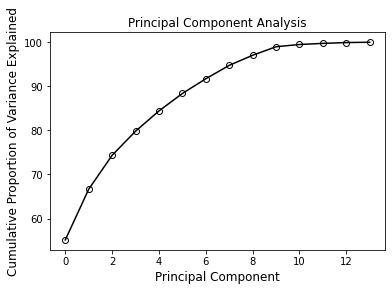

In [26]:
cumulative_var = np.cumsum(np.round(var, decimals=4)*100)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)

In [29]:
pca_train = pd.DataFrame(pca_train,columns=['PC_' + str(i) for i in range(1, 15)])
pca_train.head()


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14
0,-0.564412,1.047317,1.428580,-1.367041,0.990836,-0.609249,-0.385866,-0.167042,0.359042,-0.307785,-0.107007,0.117339,-0.018833,-0.117243
1,-1.817604,0.379977,-0.539567,-0.288923,0.404740,-0.772965,-0.003206,-0.564872,-0.482939,-0.352726,0.029875,-0.226678,0.000272,0.038576
2,-0.760539,0.377257,0.333562,0.549030,0.519851,-0.836225,0.179211,0.275426,-0.123228,0.027549,-0.639480,0.058523,-0.168018,0.046789
3,-2.115268,-0.670386,0.089358,0.755257,-0.169457,0.489438,-0.170045,-0.008905,0.530217,-0.306543,0.368016,0.063372,-0.018195,-0.003550
4,-0.644183,-1.586084,0.581050,0.234675,0.096852,0.543801,0.287691,0.031812,0.315300,0.133846,0.267819,0.211557,0.005207,0.000704


In [30]:
Y_train1 = Y_train.reset_index()
 
pca_train1 = pd.concat([pca_train,Y_train1],axis=1)
pca_train2 = pca_train1.drop(columns='index')
pca_train3 = pca_train1[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7','WPI']]
pca_train3.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,WPI
0,-0.564412,1.047317,1.428580,-1.367041,0.990836,-0.609249,-0.385866,0.494558
1,-1.817604,0.379977,-0.539567,-0.288923,0.404740,-0.772965,-0.003206,0.222834
2,-0.760539,0.377257,0.333562,0.549030,0.519851,-0.836225,0.179211,0.251002
3,-2.115268,-0.670386,0.089358,0.755257,-0.169457,0.489438,-0.170045,0.200838
4,-0.644183,-1.586084,0.581050,0.234675,0.096852,0.543801,0.287691,0.332244


In [31]:
pca_train3

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,WPI
0,-0.564412,1.047317,1.428580,-1.367041,0.990836,-0.609249,-0.385866,0.494558
1,-1.817604,0.379977,-0.539567,-0.288923,0.404740,-0.772965,-0.003206,0.222834
2,-0.760539,0.377257,0.333562,0.549030,0.519851,-0.836225,0.179211,0.251002
3,-2.115268,-0.670386,0.089358,0.755257,-0.169457,0.489438,-0.170045,0.200838
4,-0.644183,-1.586084,0.581050,0.234675,0.096852,0.543801,0.287691,0.332244
...,...,...,...,...,...,...,...,...
334,-1.151677,-1.598798,-0.491440,-0.192496,-0.074994,-0.089633,0.713248,0.254773
335,9.635201,-0.688087,-0.634089,0.569479,-0.803801,0.144252,0.600493,0.481364
336,-2.379838,0.841379,0.090128,0.199914,-0.327072,0.340481,-0.217671,0.213004
337,-1.391408,1.175415,-0.022535,0.525601,-0.779493,-0.159653,-0.058593,0.195486
